In [1]:
import obspy.imaging.beachball  as beachball
import matplotlib.pyplot as plt
from numpy import sin, cos, deg2rad
import numpy as np

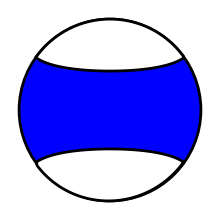

90.0000000205 44.9999999897 90.0000000205


In [2]:
mt = beachball.MomentTensor([1, -2, 1, 0, 0, 0], 26)
beachball.beachball(mt)
nodal_plane = beachball.mt2plane(mt)
print(nodal_plane.strike, nodal_plane.dip, nodal_plane.rake)

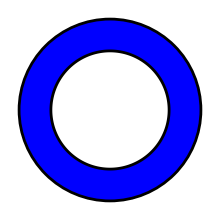

90.0000000205 44.9999999897 270.000000021


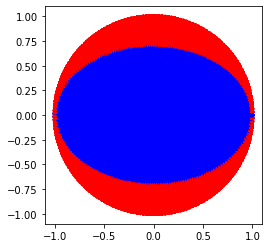

In [6]:
mt = beachball.MomentTensor([0.91, -0.89, -0.02, 1.78, -1.55, 0.47], 26)
mt = beachball.MomentTensor([-2, 1, 1, 0, 0, 0], 26)
beachball.beachball(mt)
nodal_plane = beachball.mt2plane(mt)
print(nodal_plane.strike, nodal_plane.dip, nodal_plane.rake)

def radiation_P(mt, azimuths, takeoff_angles):
    phi = deg2rad(90.0-azimuths)
    takeoff = deg2rad(takeoff_angles)
    px = sin(takeoff) * cos(phi)
    py = sin(takeoff) * sin(phi)
    pz = cos(takeoff)
    mat = np.zer

def radiation_P_old(phi, i):
    phi_f = deg2rad(nodal_plane.strike)
    delta = deg2rad(nodal_plane.dip)
    lamda = deg2rad(nodal_plane.rake) # rake is slip

    s_R = sin(lamda)*sin(delta)*cos(delta)
    q_R = sin(lamda)*cos(delta*2.0)*sin(phi_f-phi) + cos(lamda)*cos(delta)*cos(phi_f-phi)
    p_R = cos(lamda)*sin(delta)*sin(2*(phi_f-phi)) - sin(lamda)*sin(delta)*cos(delta)*cos(2*(phi_f-phi))

    Rp = s_R*(3*cos(i)*cos(i)-1) - q_R*sin(2.0*i) - p_R*sin(i)*sin(i)
    return Rp

fig, ax = plt.subplots(1, 1, subplot_kw={'aspect': 'equal'} )
#angs = list()
#dists = list()
xs, ys = list(), list()
Rps = list()
for phi in np.linspace(0, np.pi*2, 200):
    for i in np.linspace(0, 0.5*np.pi, 200):
        tmp = radiation_P(np.pi*0.5-phi, i)
        tmp = 1 if tmp>0 else -1
        #angs.append(phi)
        #dists.append(sin(i))
        xs.append(sin(i) * cos(phi) )
        ys.append(sin(i) * sin(phi) )
        Rps.append( tmp )

ax.scatter(xs, ys, 10, Rps, cmap='bwr', vmin=-1, vmax=1)
